In [1]:
import pandas as pd
import os
import matplotlib.pylab as plt
import pylab
%matplotlib inline

In [4]:
!curl https://data.cityofnewyork.us/api/views/nu7n-tubp/rows.csv?accessType=DOWNLOAD >dog.csv 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13.0M    0 13.0M    0     0  1215k      0 --:--:--  0:00:10 --:--:-- 1453k


In [11]:
os.getenv("PUIDATA")

'/nfshome/cl4855/PUIdata'

In [2]:
!mv dog.csv $PUIDATA

mv: cannot stat 'dog.csv': No such file or directory


In [3]:
dog = pd.read_csv("%s/dog.csv"%os.getenv("PUIDATA"))
dog.head()

,RowNumber,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,CommunityDistrict,CensusTract2010,NTA,CityCouncilDistrict,CongressionalDistrict,StateSenatorialDistrict,LicenseIssuedDate,LicenseExpiredDate
0,1753,SHADOW,M,01/01/2000 12:00:00 AM,Beagle,Brooklyn,11236.0,318.0,1014.0,BK50,46.0,8.0,19.0,12/29/2014,01/30/2016
1,2415,ROCCO,M,10/01/2011 12:00:00 AM,Boxer,Brooklyn,11210.0,314.0,756.0,BK43,45.0,9.0,17.0,01/07/2015,01/30/2016
2,3328,LUIGI,M,09/01/2005 12:00:00 AM,Maltese,Bronx,10464.0,210.0,516.0,BX10,13.0,14.0,34.0,01/17/2015,02/02/2016
3,7537,PETUNIA,F,08/01/2013 12:00:00 AM,Pug,Brooklyn,11221.0,304.0,419.0,BK78,34.0,7.0,18.0,03/01/2015,03/28/2016
4,8487,ROMEO,M,10/01/2008 12:00:00 AM,Maltese,Bronx,10451.0,201.0,65.0,BX34,17.0,15.0,32.0,03/09/2015,03/09/2016


In [4]:
dog.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,RowNumber,ZipCode,CommunityDistrict,CensusTract2010,CityCouncilDistrict,CongressionalDistrict,StateSenatorialDistrict
count,121949.000000,121948.000000,118612.000000,118612.000000,118612.000000,118612.000000,118612.000000
mean,61135.411483,10678.399424,265.208689,7340.266997,22.827749,10.264939,23.537290
std,35319.806867,917.181379,137.623473,21419.097363,16.638500,2.868837,6.693253
min,1.000000,121.000000,101.000000,1.000000,1.000000,3.000000,10.000000
25%,30491.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,61250.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,91738.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,122229.000000,94608.000000,595.000000,157903.000000,51.000000,16.000000,36.000000


In [5]:
dog=dog.dropna()

In [6]:
dog.describe()

,RowNumber,ZipCode,CommunityDistrict,CensusTract2010,CityCouncilDistrict,CongressionalDistrict,StateSenatorialDistrict
count,118386.000000,118386.000000,118386.000000,118386.000000,118386.000000,118386.000000,118386.000000
mean,61130.721107,10669.071140,265.103433,7337.327336,22.822868,10.266366,23.544101
std,35312.219116,578.499928,137.633720,21414.176866,16.643050,2.867605,6.690878
min,1.000000,10001.000000,101.000000,1.000000,1.000000,3.000000,10.000000
25%,30486.250000,10029.000000,108.000000,126.000000,6.000000,8.000000,18.000000
50%,61257.500000,10464.000000,302.000000,251.000000,22.000000,11.000000,25.000000
75%,91733.750000,11226.000000,403.000000,912.000000,37.000000,12.000000,28.000000
max,122229.000000,11697.000000,595.000000,157903.000000,51.000000,16.000000,36.000000


In [7]:
dog.columns

Index(['RowNumber', 'AnimalName', 'AnimalGender', 'AnimalBirthMonth',
       'BreedName', 'Borough', 'ZipCode', 'CommunityDistrict',
       'CensusTract2010', 'NTA', 'CityCouncilDistrict',
       'CongressionalDistrict', 'StateSenatorialDistrict', 'LicenseIssuedDate',
       'LicenseExpiredDate'],
      dtype='object')

In [8]:
Dog=dog.drop(['RowNumber', 'AnimalName', 'AnimalGender', 'AnimalBirthMonth',
        'ZipCode', 'CommunityDistrict',
       'CensusTract2010', 'NTA', 'CityCouncilDistrict',
       'CongressionalDistrict', 'StateSenatorialDistrict', 'LicenseIssuedDate',
       'LicenseExpiredDate'],axis=1)

In [9]:
Dog.head()

,BreedName,Borough
0,Beagle,Brooklyn
1,Boxer,Brooklyn
2,Maltese,Bronx
3,Pug,Brooklyn
4,Maltese,Bronx


In [10]:
Dogbreed=pd.DataFrame(Dog.groupby(['Borough','BreedName']).size().reset_index())

In [11]:
Dogbreed.rename(columns={0:'Count'},inplace=True)
Dogbreed.head()

,Borough,BreedName,Count
0,ARVERNE,Dachshund Smooth Coat Miniature,1
1,ASTORIA,American Eskimo dog,1
2,ASTORIA,Bichon Frise,2
3,Astoria,Chihuahua,1
4,Astoria,Unknown,1


In [12]:
Dogorder=Dogbreed.sort_values('Count',ascending=False)
Dogorder

,Borough,BreedName,Count
914,Manhattan,Unknown,5463
564,Brooklyn,Unknown,3962
1250,Queens,Unknown,3450
928,Manhattan,Yorkshire Terrier,2017
577,Brooklyn,Yorkshire Terrier,1923
721,Manhattan,Chihuahua,1871
542,Brooklyn,Shih Tzu,1838
892,Manhattan,Shih Tzu,1768
1519,Staten Island,Unknown,1643
807,Manhattan,Labrador Retriever,1618


In [13]:
MND=Dogorder[Dogorder['Borough']=='Manhattan']
MND.head()

,Borough,BreedName,Count
914,Manhattan,Unknown,5463
928,Manhattan,Yorkshire Terrier,2017
721,Manhattan,Chihuahua,1871
892,Manhattan,Shih Tzu,1768
807,Manhattan,Labrador Retriever,1618


In [14]:
BKD=Dogorder[Dogorder['Borough']=='Brooklyn']
BKD.head()

,Borough,BreedName,Count
564,Brooklyn,Unknown,3962
577,Brooklyn,Yorkshire Terrier,1923
542,Brooklyn,Shih Tzu,1838
379,Brooklyn,Chihuahua,1456
321,Brooklyn,American Pit Bull Mix / Pit Bull Mix,1033


In [15]:
QND=Dogorder[Dogorder['Borough']=='Queens']
QND.head()

,Borough,BreedName,Count
1250,Queens,Unknown,3450
1263,Queens,Yorkshire Terrier,1607
1230,Queens,Shih Tzu,1496
1164,Queens,Maltese,1129
1085,Queens,Chihuahua,1057


In [16]:
SID=Dogorder[Dogorder['Borough']=='Staten Island']
SID.head()

,Borough,BreedName,Count
1519,Staten Island,Unknown,1643
1530,Staten Island,Yorkshire Terrier,694
1501,Staten Island,Shih Tzu,687
1434,Staten Island,Labrador Retriever,551
1439,Staten Island,Maltese,378


In [17]:
BXD=Dogorder[Dogorder['Borough']=='Bronx']
BXD.head()

,Borough,BreedName,Count
297,Bronx,Unknown,1453
308,Bronx,Yorkshire Terrier,1171
281,Bronx,Shih Tzu,1046
154,Bronx,Chihuahua,830
108,Bronx,American Pit Bull Terrier/Pit Bull,689


In [18]:
MND.head(20)

,Borough,BreedName,Count
914,Manhattan,Unknown,5463
928,Manhattan,Yorkshire Terrier,2017
721,Manhattan,Chihuahua,1871
892,Manhattan,Shih Tzu,1768
807,Manhattan,Labrador Retriever,1618
815,Manhattan,Maltese,1174
788,Manhattan,Havanese,1161
808,Manhattan,Labrador Retriever Crossbreed,922
778,Manhattan,Golden Retriever,882
719,Manhattan,Cavalier King Charles Spaniel,803


In [19]:
BKD.head(20)

,Borough,BreedName,Count
564,Brooklyn,Unknown,3962
577,Brooklyn,Yorkshire Terrier,1923
542,Brooklyn,Shih Tzu,1838
379,Brooklyn,Chihuahua,1456
321,Brooklyn,American Pit Bull Mix / Pit Bull Mix,1033
457,Brooklyn,Labrador Retriever,929
464,Brooklyn,Maltese,926
322,Brooklyn,American Pit Bull Terrier/Pit Bull,917
458,Brooklyn,Labrador Retriever Crossbreed,791
503,Brooklyn,Pomeranian,545


In [20]:
MN=MND[1:6]

In [57]:
MN=MN.sort_values('Count').reset_index()

In [61]:
MN.head()

,index,Borough,BreedName,Count
0,815,Manhattan,Maltese,1174
1,807,Manhattan,Labrador Retriever,1618
2,892,Manhattan,Shih Tzu,1768
3,721,Manhattan,Chihuahua,1871
4,928,Manhattan,Yorkshire Terrier,2017


In [21]:
BK=BKD[1:6]

In [58]:
BK=BK.sort_values('Count').reset_index()

In [22]:
SI=SID[1:6]

In [49]:
SI=SI.sort_values('Count')

In [23]:
QN=QND[1:6]

In [50]:
QN=QN.sort_values('Count')

In [24]:
BX=BXD[1:6]

In [51]:
BX=BX.sort_values('Count')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


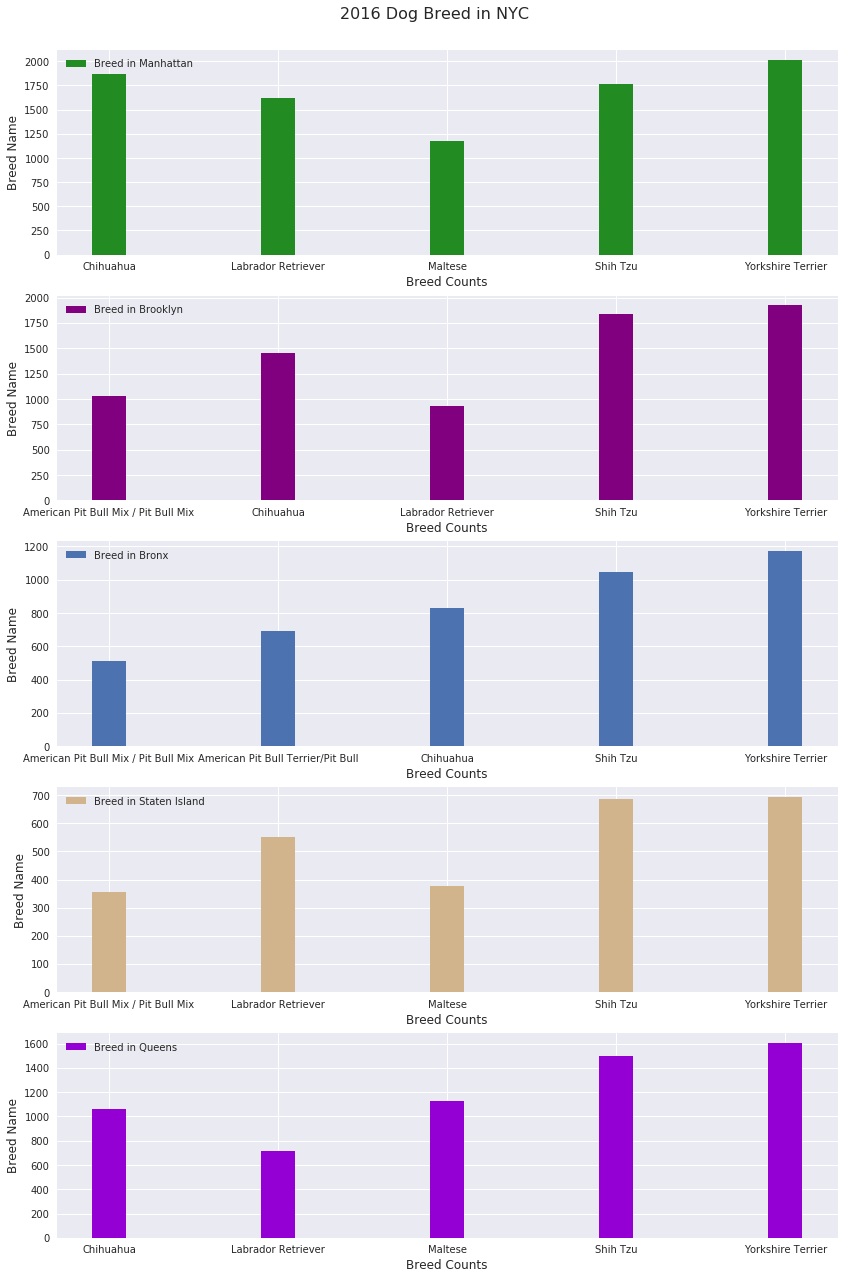

In [37]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(5,1, figsize=(14, 20))
axs[0].bar(MN.BreedName, MN.Count,width=0.2,color='forestgreen',label='Breed in Manhattan')
axs[1].bar(BK.BreedName, BK.Count,width=0.2,color='purple',label='Breed in Brooklyn')
axs[2].bar(BX.BreedName, BX.Count,width=0.2,label='Breed in Bronx')
axs[3].bar(SI.BreedName, SI.Count,width=0.2,color='tan',label='Breed in Staten Island')
axs[4].bar(QN.BreedName, QN.Count,width=0.2,color='darkviolet',label='Breed in Queens')
for i in range(0,5):
    axs[i].legend()
    axs[i].set_xlabel('Breed Counts',fontsize=12)
    axs[i].set_ylabel('Breed Name',fontsize=12)
fig.suptitle('2016 Dog Breed in NYC',fontsize=16)
fig.subplots_adjust(top=0.95)
pylab.savefig('Dogbreed.png')

## Improve

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


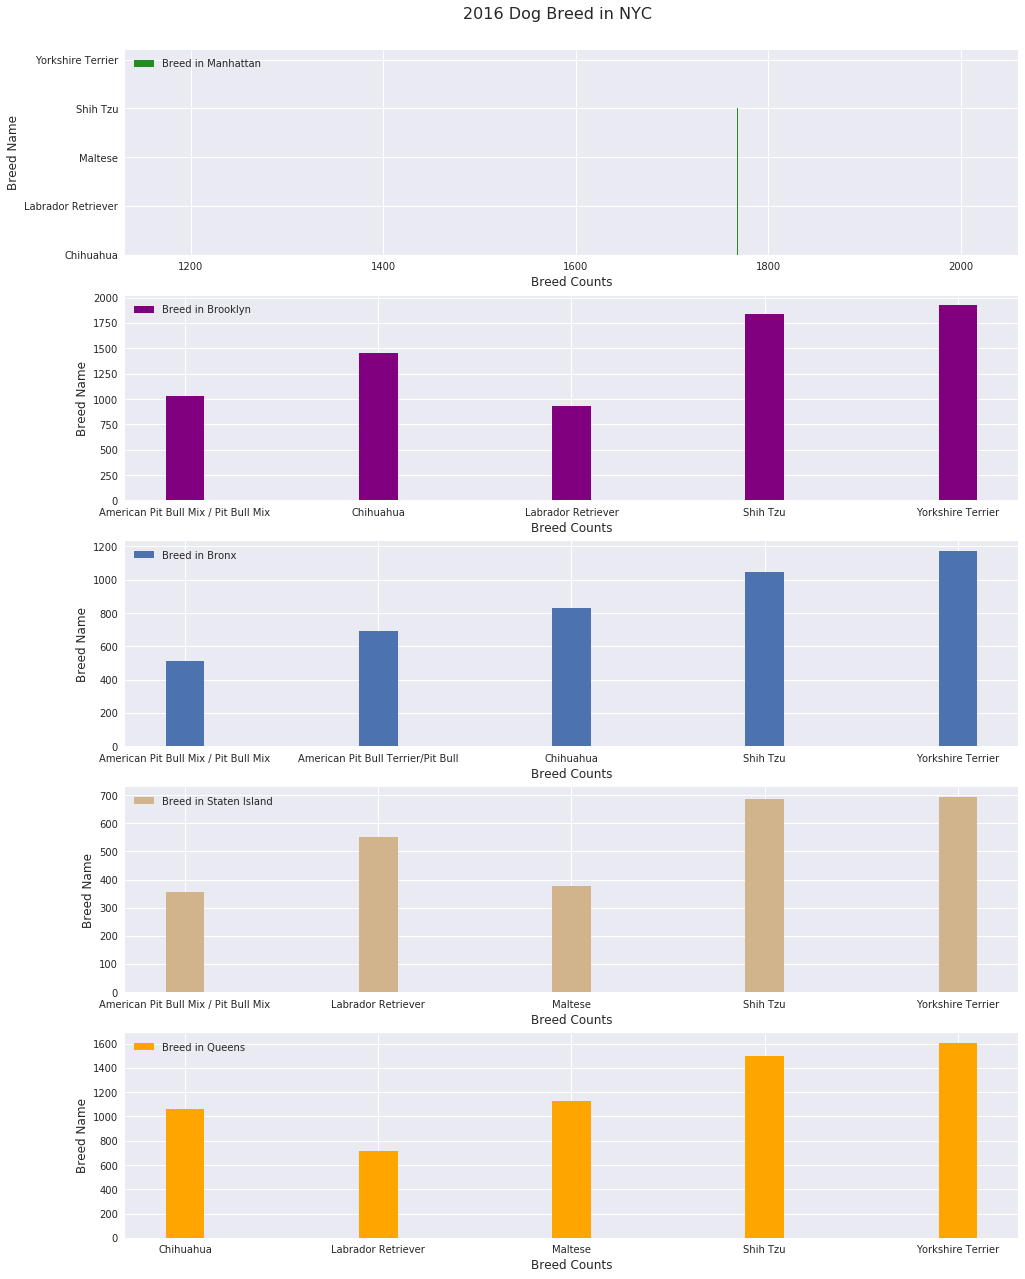

In [62]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(5,1, figsize=(16, 20))
axs[0].bar(MN.BreedName, MN.Count,width=0.2,color='forestgreen',label='Breed in Manhattan')
axs[1].bar(BK.BreedName, BK.Count,width=0.2,color='purple',label='Breed in Brooklyn')
axs[2].bar(BX.BreedName, BX.Count,width=0.2,label='Breed in Bronx')
axs[3].bar(SI.BreedName, SI.Count,width=0.2,color='tan',label='Breed in Staten Island')
axs[4].bar(QN.BreedName, QN.Count,width=0.2,color='orange',label='Breed in Queens')
for i in range(0,5):
    axs[i].legend()
    axs[i].set_xlabel('Breed Counts',fontsize=12)
    axs[i].set_ylabel('Breed Name',fontsize=12)
fig.suptitle('2016 Dog Breed in NYC',fontsize=16)
fig.subplots_adjust(top=0.95)
pylab.savefig('Dogbreed.png')

Figure: Based on the suggestion from Sarah and Nathan. The colors of Queens and Brooklyn are all purple which is bad for viewing. So I change the color. And also at first the Mahattan label cover the bar. So I import sns package to solove it.